# Convolution Method

Here we demonstrate the method of obtaining the redshift distribution
via convolution of the luminosity function with the survey volume.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np
from processing import helpers as h

In [2]:
data_path = "jmas_data/redshift_distributions/convolution_method/"
redshift_range = np.load(f"{data_path}redshift_range.npy")
redshift_distribution = np.load(f"{data_path}redshift_distribution.npy")
luminosity_at_redshift = np.load(f"{data_path}luminosity_at_redshift.npy")
comoving_volume = np.load(f"{data_path}comoving_volume.npy")

dpi = h.dpi

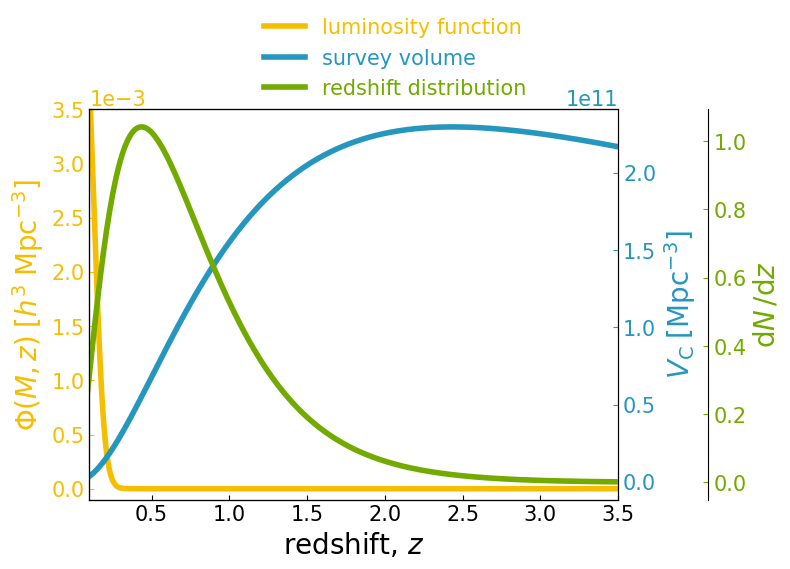

In [3]:
# Set global plot parameters
plt.rcParams["lines.linewidth"] = 4
plt.rc("xtick", labelsize=15) 
plt.rc("ytick", labelsize=15)

# Create a figure and a set of subplots (in this case, only one)
fig, ax1 = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')

# Create two additional axes that share the x-axis with ax1
ax2 = ax1.twinx()
ax3 = ax1.twinx()

cyberyellow = "#F6BE00"
teal = "#2596be"
green = "#72aa00"

# Create and format the first line (luminosity function)
line1, = ax1.plot(redshift_range, luminosity_at_redshift, c=cyberyellow, label="luminosity function")
ax1.set_xlabel("redshift, $z$", fontsize=20)
ax1.set_ylabel("$\Phi (M, z) \; [h^3 \; \\rm{Mpc^{-3}}]$", color=cyberyellow, fontsize=20)
ax1.tick_params("y", colors=cyberyellow)
ax1.set_xlim(0.1, 3.5)
ax1.set_ylim(-0.0001, 0.0035)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Create and format the second line (comoving volume)
line2, = ax2.plot(redshift_range, comoving_volume, c=teal, label="comoving volume")
ax2.set_ylabel("$V_{\mathrm{C}} \; [\mathrm{Mpc^{-3}}]$",  color=teal, fontsize=20)
ax2.tick_params("y",  colors=teal)

# Create and format the third line (redshift distribution)
# The axis is shifted to the right for clear visibility
ax3.spines['right'].set_position(('outward', 65))
line3, = ax3.plot(redshift_range, redshift_distribution, c=green, label="redshift distribution")
dndz_label = "$\\mathrm{d}N \\// \\mathrm{d}z$"
ax3.set_ylabel(dndz_label, color=green, fontsize=20)
ax3.tick_params("y", colors=green,direction="in")

# Define axes, colors, and labels for later use
axs = [ax1, ax2, ax3]
colors = [cyberyellow, teal, green]
labels = ["luminosity function", "survey volume", "redshift distribution"]

# Set common parameters for all axes
for ax in axs:
    ax.tick_params(direction='in', axis='both', which='both', labelsize=15)

# Create the legend with color-matched text
lines = [line1, line2, line3]
legend = fig.legend(lines, labels, frameon=False, fontsize=15, loc='upper center', bbox_to_anchor=(0.5, 1.15))
for line, text in zip(legend.get_lines(), legend.get_texts()):
    text.set_color(line.get_color())  # Color match the legend text to the line color

# Automatically adjust the subplot parameters to give specified padding
plt.tight_layout()


path = "plots_output/redshift_distributions/"
plt.savefig(path + f"convolution_method.pdf", bbox_inches="tight", dpi=dpi["pdf"])
plt.savefig(path + f"convolution_method.png", bbox_inches="tight", dpi=dpi["png"], transparent=False)


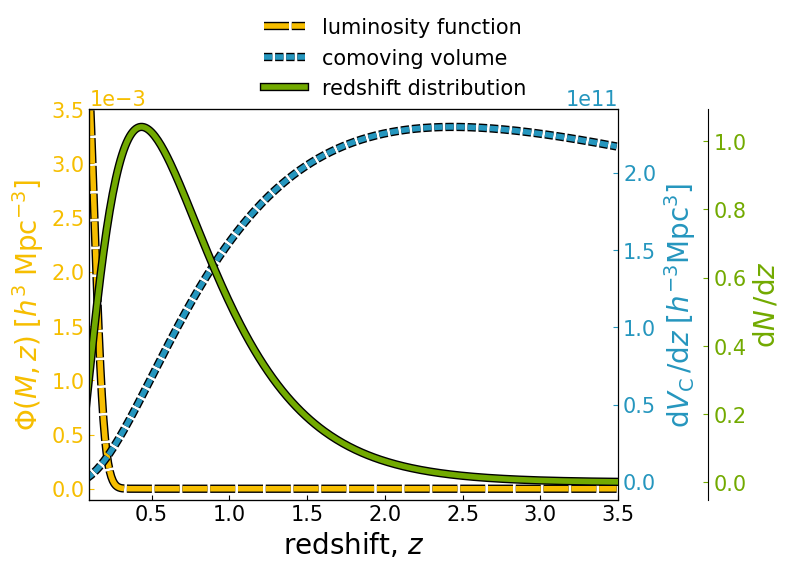

In [11]:
# Set global plot parameters
plt.rcParams["lines.linewidth"] = 4
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)

# Create a figure and a set of subplots (in this case, only one)
fig, ax1 = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')

# Create two additional axes that share the x-axis with ax1
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Define colors
cyberyellow = "#F6BE00"
teal = "#2596be"
green = "#72aa00"
outline_color = 'black'  # Color for the outline
outline_width = 6        # Width for the outline

# Path effect to create an outline
outline_effect = [pe.Stroke(linewidth=outline_width, foreground=outline_color), pe.Normal()]

# Custom dash patterns (dash length, gap length)
dash_pattern = [4.5, .5]  # Increase dash size (10 is the length of the dash, 5 is the gap)
dot_pattern = [1.5, .5]    # Larger dot (2 is the length of the "dot", 6 is the gap)

# Plot with outlined lines and custom dash patterns
line1, = ax1.plot(redshift_range, luminosity_at_redshift, c=cyberyellow, ls="--", label="luminosity function",
                  path_effects=outline_effect, dashes=dash_pattern)  # Custom dash pattern
ax1.set_xlabel("redshift, $z$", fontsize=20)
ax1.set_ylabel("$\Phi (M, z) \; [h^3 \; \\rm{Mpc^{-3}}]$", color=cyberyellow, fontsize=20)
ax1.tick_params("y", colors=cyberyellow)
ax1.set_xlim(0.1, 3.5)
ax1.set_ylim(-0.0001, 0.0035)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Plot the second line (comoving volume) with an outline and custom dot pattern
line2, = ax2.plot(redshift_range, comoving_volume, c=teal, ls=":", label="comoving volume", 
                  path_effects=outline_effect, dashes=dot_pattern)  # Custom dot pattern
ax2.set_ylabel("${\mathrm{d} V_{\mathrm{C}}} \\// {\mathrm{d} z} \; [h^{-3} \mathrm{Mpc^{3}}]$", color=teal, fontsize=20)
ax2.tick_params("y", colors=teal)

# Plot the third line (redshift distribution) with an outline (solid line, no dashes)
ax3.spines['right'].set_position(('outward', 65))
line3, = ax3.plot(redshift_range, redshift_distribution, c=green, label="redshift distribution",
                  path_effects=outline_effect)  # No dashes, solid line

dndz_label = "$\\mathrm{d}N \\// \\mathrm{d}z$"
ax3.set_ylabel(dndz_label, color=green, fontsize=20)
ax3.tick_params("y", colors=green, direction="in")

# Define axes, colors, and labels for later use
axs = [ax1, ax2, ax3]
labels = ["luminosity function", "comoving volume", "redshift distribution"]

# Set common parameters for all axes
for ax in axs:
    ax.tick_params(direction='in', axis='both', which='both', labelsize=15)

# Create the legend, using the same lines as in the plot (which now have outlines)
legend = fig.legend([line1, line2, line3], labels, frameon=False, fontsize=15, loc='upper center', bbox_to_anchor=(0.5, 1.15))

# Automatically adjust the subplot parameters to give specified padding
plt.tight_layout()

# Save the figure
path = "plots_output/redshift_distributions/"
plt.savefig(path + f"convolution_method_outlined.pdf", bbox_inches="tight", dpi=300)
plt.savefig(path + f"convolution_method_outlined.png", bbox_inches="tight", dpi=300, transparent=False)
